<a href="https://colab.research.google.com/github/Rohit4352/Campus_recruitment/blob/master/multiple_regression_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple Linear Regression**

1) Develop an estimated multiple linear regression equation with mbap as response variable and sscp & hscp as the two predictor variables. Interpret the regression coefficients and check whether they are significant based on the summary output 

2) Estimate a multiple regression equation for each of the below scenarios and based on the model’s R-square comment which model is better. 
    
    (i) Use mbap as outcome variable and sscp & degreep as the two predictor variables.
    
    (ii) Use mbap as outcome variable and hscp & degreep as the two predictor variables. 

3) Show the functional form of a multiple regression model. Build a regression model with mbap as dependent variable and sscp, hscp and degree_p as three independent variables. 
    
    Divide the dataset in the ratio of 80:20 for train and test set (set seed as 1001) and use the train set to build the model. Show the model summary and interpret the p-values of the regression coefficients. 
    
    Remove any insignificant variables and rebuild the model. 
    
    Use this model for prediction on the test set and show the first few observations’ actual value of the test set in comparison to the predicted value.

# Packages

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # graphs potting 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset

In [ ]:
dataframe = pd.read_csv("Placement_Data_Full_Class.csv")
dataframe.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
data_reg = dataframe.copy()
data_class = dataframe.copy()

# Visualization

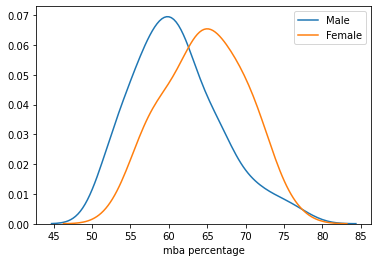

In [ ]:
#This plot shows marks distribution in mba
sns.kdeplot(dataframe.mba_p[ dataframe.gender=="M"])
sns.kdeplot(dataframe.mba_p[ dataframe.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("mba percentage")
plt.show()

# splitting the data

In [ ]:
# Seperating independent and dependent variables
#dependent variables ssc_p, hsc_p
X = data_class.iloc[:,[2,4]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

In [ ]:
#splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

# Training regression model

1. **Develop an estimated multiple linear regression equation with mbap as response variable and sscp & hscp as the two predictor variables. Interpret the regression coefficients and check whether they are significant based on the summary output**

In [ ]:
#Multiple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_m = regressor.predict(X_test)

In [ ]:
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred_m.reshape(len(y_pred_m),1), y_test.reshape(len(y_test),1)),1)) 

In [ ]:
from sklearn.metrics import r2_score, classification_report
print("R2 score:" + str(r2_score(y_test, y_pred_m)))

R2 score:0.1749591688855493


## Getting the final regression equation with the values of the coefficients




In [ ]:
print("regression coeff:" + str(regressor.coef_))
print("regression intercept:" + str(regressor.intercept_))
print("mba_p = " + str(regressor.coef_[0][0]) + " x ssc_p + " + str(regressor.coef_[0][1]) + " hsc_p + " + str(regressor.intercept_[0]))

regression coeff:[[0.14 0.13]]
regression intercept:[44.05]
mba_p = 0.13869167060644713 x ssc_p + 0.13315394584239654 hsc_p + 44.04616422260859


Therefore, the equation of our multiple linear regression model is:

$$\textrm{mba_p} = 0.14 \times \textrm{ssc_p} + 0.13 \times \textrm{hsc_p} + 44.05$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.


2. **Estimate a multiple regression equation for each of the below scenarios and based on the model’s R-square comment which model is better.** 
    
    (i) Use mbap as outcome variable and sscp & degreep as the two predictor variables.    

In [ ]:
# Seperating independent and dependent variables
#dependent variables ssc_p, degree_p
X = data_class.iloc[:,[2,7]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#Multiple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_m = regressor.predict(X_test)

np.set_printoptions(precision=2)
#print(np.concatenate((y_pred_m.reshape(len(y_pred_m),1), y_test.reshape(len(y_test),1)),1)) 

from sklearn.metrics import r2_score, classification_report
print("R2 score:" + str(r2_score(y_test, y_pred_m)))
print("regression coeff:" + str(regressor.coef_))
print("regression intercept:" + str(regressor.intercept_))
print("mba_p = 0.12 x ssc_p + 0.22 x degree_p + 39.66")

R2 score:0.2670526417462228
regression coeff:[[0.12 0.22]]
regression intercept:[39.66]
mba_p = 0.12 x ssc_p + 0.22 x degree_p + 39.66


2. **Estimate a multiple regression equation for each of the below scenarios and based on the model’s R-square comment which model is better.** 
    
    (ii) Use mbap as outcome variable and hscp & degreep as the two predictor variables.

In [ ]:
# Seperating independent and dependent variables
X = data_class.iloc[:,[4,7]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#Multiple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_m = regressor.predict(X_test)

np.set_printoptions(precision=2)
#print(np.concatenate((y_pred_m.reshape(len(y_pred_m),1), y_test.reshape(len(y_test),1)),1)) 

from sklearn.metrics import r2_score, classification_report
print("R2 score:" + str(r2_score(y_test, y_pred_m)))
print("regression coeff:" + str(regressor.coef_))
print("regression intercept:" + str(regressor.intercept_))
print("mba_p = " + str(regressor.coef_[0][0]) + " x hsc_p + " + str(regressor.coef_[0][1]) + " x degree_p + " + str(regressor.intercept_[0]))

R2 score:0.17616396722600414
regression coeff:[[0.13 0.23]]
regression intercept:[38.56]
mba_p = 0.13171318061863166 x hsc_p + 0.22510364524995355 x degree_p + 38.56332437694495


# > **Model with mbap as outcome variable and sscp & degreep as the two predictor variables is better since the r2_score is 26.7**

3) **Show the functional form of a multiple regression model. Build a regression model with mbap as dependent variable and sscp, hscp and degree_p as three independent variables.** 
    
    Divide the dataset in the ratio of 80:20 for train and test set (set seed as 1001) and use the train set to build the model. Show the model summary and interpret the p-values of the regression coefficients. 
    
    Remove any insignificant variables and rebuild the model. 
    
    Use this model for prediction on the test set and show the first few observations’ actual value of the test set in comparison to the predicted value.

In [ ]:
# Seperating independent and dependent variables
X = data_class.iloc[:,[2,4,7]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1001)

#Multiple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predict the values
y_pred_m = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, classification_report

#R2 score
print("R2 score:" + str(r2_score(y_test, y_pred_m)))

#model p values
print("regression coeff:" + str(regressor.coef_))
print("regression intercept:" + str(regressor.intercept_))
print("mba_p = " + str(regressor.coef_[0][0]) + " x hsc_p + " + str(regressor.coef_[0][1]) + " x degree_p + " + str(regressor.intercept_[0]))

R2 score:0.09169950978709318
regression coeff:[[0.14 0.1  0.13]]
regression intercept:[38.04]
mba_p = 0.1399960483664397 x hsc_p + 0.09707612077432573 x degree_p + 38.03640753430685


In [ ]:
np.set_printoptions(precision=2)
dff = pd.DataFrame(list(zip(y_test, y_pred_m.round(2))),columns=("Target","Predicted"))
dff.head(8)

,Target,Predicted
0,[62.54],[61.76]
1,[70.81],[67.88]
2,[72.14],[63.43]
3,[69.7],[66.37]
4,[65.48],[58.44]
5,[61.31],[63.52]
6,[52.64],[61.12]
7,[57.65],[63.16]


$$\textrm{If you like the work please upvote :-) }$$
**$$\textrm{Comments are Welcome}$$**